In [165]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
df = pd.read_csv(r'kindle_review.csv')

In [167]:
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


5    3000
4    3000
3    2000
2    2000
1    2000
Name: rating, dtype: int64


<Axes: >

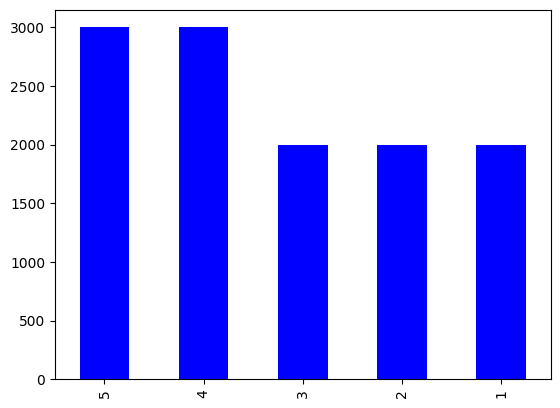

In [168]:
print(df['rating'].value_counts())
df['rating'].value_counts().plot.bar(color='blue')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [170]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'reviewTime', 'reviewerID','reviewerName','unixReviewTime'], axis=1, inplace=True)

In [171]:
df.isnull().sum()

rating        0
reviewText    0
summary       0
dtype: int64

In [172]:
df['labels'] = df['rating'].apply(lambda x: 1 if x >=3 else 0)

In [173]:
df.head()

,rating,reviewText,summary,labels
0,3,"Jace Rankin may be short, but he's nothing to ...",Entertaining But Average,1
1,5,Great short read. I didn't want to put it dow...,Terrific menage scenes!,1
2,3,I'll start by saying this is the first of four...,Snapdragon Alley,1
3,3,Aggie is Angela Lansbury who carries pocketboo...,very light murder cozy,1
4,4,I did not expect this type of book to be in li...,Book,1


1    8000
0    4000
Name: labels, dtype: int64


<Axes: >

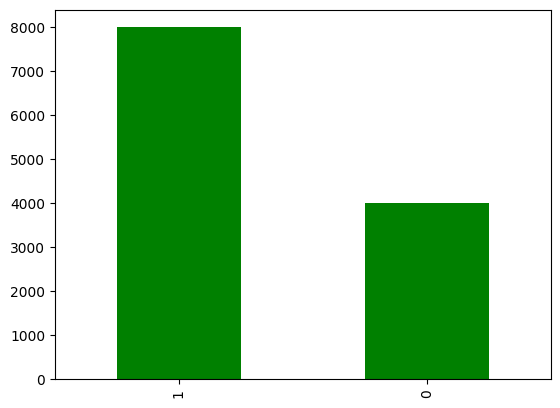

In [174]:
print(df['labels'].value_counts())
df['labels'].value_counts().plot.bar(color='green')

In [175]:
# Dependent Feature
y = df['labels']

# Independent Features
X = df['reviewText']  # Note the use of double square brackets [[]] to select multiple columns


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [178]:
# Train Naive Bayes Classifier (NBC)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [179]:
nb_predictions = nb_classifier.predict(X_test_tfidf)

In [180]:
# Evaluate performance
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, pos_label=1)
nb_recall = recall_score(y_test, nb_predictions, pos_label=1)
nb_f1 = f1_score(y_test, nb_predictions, pos_label=1)

In [181]:
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)
print("Multinomial Naive Bayes Precision (positive):", nb_precision)
print("Multinomial Naive Bayes Recall (positive):", nb_recall)
print("Multinomial Naive Bayes F1-score (positive):", nb_f1)

Multinomial Naive Bayes Accuracy: 0.7829166666666667
Multinomial Naive Bayes Precision (positive): 0.7676616915422886
Multinomial Naive Bayes Recall (positive): 0.9661865998747652
Multinomial Naive Bayes F1-score (positive): 0.8555586359855837


In [182]:
# Create and train Linear SVC model
svc_classifier = LinearSVC()
svc_classifier.fit(X_train_tfidf, y_train)

LinearSVC()

In [183]:
svc_predictions = svc_classifier.predict(X_test_tfidf)

In [184]:
# Evaluate performance
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions, pos_label=1)
svc_recall = recall_score(y_test, svc_predictions, pos_label=1)
svc_f1 = f1_score(y_test, svc_predictions, pos_label=1)

In [185]:
print("Linear Support Vector Classifier Accuracy:", svc_accuracy)
print("Linear Support Vector Classifier Precision (positive):", svc_precision)
print("Linear Support Vector Classifier Recall (positive):", svc_recall)
print("Linear Support Vector Classifier F1-score (positive):", svc_f1)

Linear Support Vector Classifier Accuracy: 0.84625
Linear Support Vector Classifier Precision (positive): 0.8694344163658243
Linear Support Vector Classifier Recall (positive): 0.9048215403882279
Linear Support Vector Classifier F1-score (positive): 0.8867750843817123


In [186]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [187]:
tokenizer_lstm = keras.preprocessing.text.Tokenizer()
tokenizer_lstm.fit_on_texts(X_train)  # Use X_train, not X_train_tfidf
X_train_seq = tokenizer_lstm.texts_to_sequences(X_train)
X_val_seq = tokenizer_lstm.texts_to_sequences(X_test)

In [188]:
num_classes = 2

X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=100)
X_val_padded = keras.preprocessing.sequence.pad_sequences(X_val_seq, maxlen=100)

model_lstm = keras.Sequential([
    keras.layers.Embedding(input_dim=len(tokenizer_lstm.word_index) + 1, output_dim=128, input_length=100),
    keras.layers.LSTM(64),
    keras.layers.Dense(num_classes, activation='softmax')
])
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_padded, y_train_encoded, validation_data=(X_val_padded, y_test_encoded), epochs=5, batch_size=32)

_, accuracy_lstm = model_lstm.evaluate(X_val_padded, y_test_encoded)

Epoch 1/5
300/300 [==============================] - 46s 144ms/step - loss: 0.4534 - accuracy: 0.7852 - val_loss: 0.3672 - val_accuracy: 0.8367
Epoch 2/5
300/300 [==============================] - 15s 49ms/step - loss: 0.2521 - accuracy: 0.8975 - val_loss: 0.3742 - val_accuracy: 0.8421
Epoch 3/5
300/300 [==============================] - 12s 40ms/step - loss: 0.1508 - accuracy: 0.9436 - val_loss: 0.4754 - val_accuracy: 0.8383
Epoch 4/5
300/300 [==============================] - 7s 24ms/step - loss: 0.0914 - accuracy: 0.9667 - val_loss: 0.6075 - val_accuracy: 0.8154
Epoch 5/5
75/75 [==============================] - 0s 4ms/step - loss: 0.5733 - accuracy: 0.8183


In [189]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_encoded = tokenizer(X_train.tolist(), padding='max_length', truncation=True, max_length=100, return_tensors='tf')
X_test_encoded = tokenizer(X_test.tolist(), padding='max_length', truncation=True, max_length=100, return_tensors='tf')

In [190]:
# Build and train your BERT-based model
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model_bert.compile(optimizer=optimizer, loss=loss, metrics=[metric])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_bert.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_val_padded, y_test_encoded))

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
300/300 [==============================] - 244s 674ms/step - loss: 0.6411 - accuracy: 0.6668 - val_loss: 0.6377 - val_accuracy: 0.6654
Epoch 2/5
300/300 [==============================] - 201s 672ms/step - loss: 0.6402 - accuracy: 0.6667 - val_loss: 0.6343 - val_accuracy: 0.6654
Epoch 3/5
300/300 [==============================] - 195s 652ms/step - loss: 0.6388 - accuracy: 0.6672 - val_loss: 0.6341 - val_accuracy: 0.6654
Epoch 4/5
300/300 [==============================] - 201s 670ms/step - loss: 0.6163 - accuracy: 0.6757 - val_loss: 0.4326 - val_accuracy: 0.7917
Epoch 5/5
300/300 [==============================] - 201s 669ms/step - loss: 0.4495 - accuracy: 0.7936 - val_loss: 0.3808 - val_accuracy: 0.8288


In [191]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train_tfidf, y_train, discrete_features=True)

mi_df = pd.DataFrame({'Feature': tfidf_vectorizer.get_feature_names_out(), 'MI_Score': mi_scores})

mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

top_n = 10
top_features = mi_df.head(top_n)

print("Top Features based on Mutual Information:")
print(top_features)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Top Features based on Mutual Information:
    Feature  MI_Score
847     the  0.553882
42      and  0.492288
861    this  0.479037
875      to  0.474487
436      it  0.465588
599      of  0.429574
933     was  0.392034
99     book  0.351369
432      is  0.346513
420      in  0.342989


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1